# A Standard Virus Load Function: Influenza data application

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.




In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['figure.figsize'] = [8, 7]
mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8
def savefigs(filename):
    plt.gcf()
    imgdir = 'figures/'
    plt.savefig(imgdir + filename + '.pdf', bbox_inches='tight')
    plt.savefig(imgdir + filename + '.png', bbox_inches='tight')

In [4]:
from VirusLoadFunction import VirusLoadFunction

## 1. Data
Using data from Smith et al. (2018), *Frontier in Microbiology*.

The dataset consists of a 13 observations of viral titers (in log10 scale) from the lung of 10 mice.

In [5]:
lines = open('../../data/Smith2018/Virus_Best10.txt').readlines()
data = []
for line in lines:
    data.append(np.array([float(p) for p in line.split(' ')]))
tdata = np.linspace(0., 12., len(data[0]))
print('Size of dataset: %d' % len(data))
print('Number of observations: %d' % len(data[0]))

Size of dataset: 10
Number of observations: 13


Showing data set

In [6]:
pd.DataFrame(data, columns=tdata, index=list(range(1,len(data)+1)))

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1,0.0,4.18551,5.67816,6.00515,5.93640,5.97712,5.44716,5.19848,4.00515,0.0,0.0,0.0,0.0
2,0.0,3.99136,5.47712,5.84488,5.82436,5.81012,5.08740,4.49136,0.00000,0.0,0.0,0.0,0.0
3,0.0,3.49136,5.44716,5.81012,5.83815,5.78016,5.29540,5.01851,2.94716,0.0,0.0,0.0,0.0
4,0.0,3.29788,5.77233,6.24612,5.49136,5.96240,5.14412,5.51851,3.23882,0.0,0.0,0.0,0.0
5,0.0,4.75515,5.96240,6.44716,5.78016,5.83244,5.99136,4.96982,0.00000,0.0,0.0,0.0,0.0
6,0.0,4.30151,5.49136,6.86448,5.70812,5.80282,4.96240,4.47712,0.00000,0.0,0.0,0.0,0.0
7,0.0,3.49136,5.79540,5.74951,6.03148,5.82436,5.29540,5.17215,3.26036,0.0,0.0,0.0,0.0
8,0.0,4.00515,6.03148,5.83815,6.26036,6.12940,5.18551,4.83815,0.00000,0.0,0.0,0.0,0.0
9,0.0,3.49136,6.18551,5.78784,5.59921,5.97712,5.34488,5.47712,0.00000,0.0,0.0,0.0,0.0
10,0.0,4.50515,6.17215,6.03148,5.49136,5.34242,5.81012,5.01188,0.00000,0.0,0.0,0.0,0.0


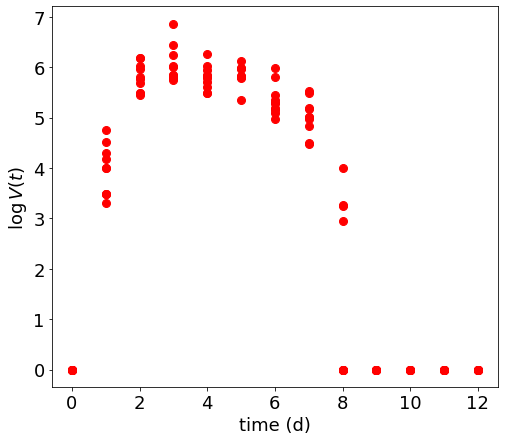

In [7]:
for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.xlabel('time (d)')
plt.ylabel('$\log\, V(t)$')
savefigs('Smith2018Data')
plt.show()

## 2. Fitting the model

We can fit the model to either the average for time point, or the whole data set combined (10 observation per time).

For the fitting we constrain the parameter values to be non-negative and less than the maximum time (for $a_1$, $a_2$, $b_1$, and $b_2$).

The fitting function (`least_square` via `curve_fit`) uses the Trust Region Reflective algorithm for constrained minimization built-in in the [`scipy.optimization` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

Use Thomas' best initial guess for the parameter values
$$
a_1=1.0,\quad a_2=2.3,\quad b_1=6.0,\quad b_2=8.5,\quad \alpha=0.5,\quad \min=10^{-6},\quad \max=1.5\times10^{6}.
$$

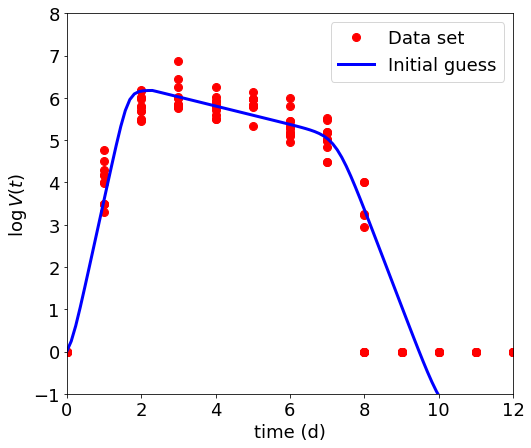

In [8]:
vl = VirusLoadFunction(tdata, vdata[0])
par0 = [1.0, 2.3, 6.0, 8.5, 0.5, 1e-6, 1.5e6]
vl.InitialGuess(*par0)

ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl.Eval(ttdata, par0)

for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.plot(tdata, data[0], 'ro', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Initial guess')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018InitialGuess')
plt.show()

### a) Average

Using the average for each time point to fit the model.

In [9]:
tdata_avg = tdata
vdata_avg = np.average(data, axis=0)
vdata_std = np.std(data, axis=0)
vl_avg = VirusLoadFunction(tdata_avg, vdata_avg)

In [10]:
vl_avg.InitialGuess(*par0)
vl_avg.Fit()

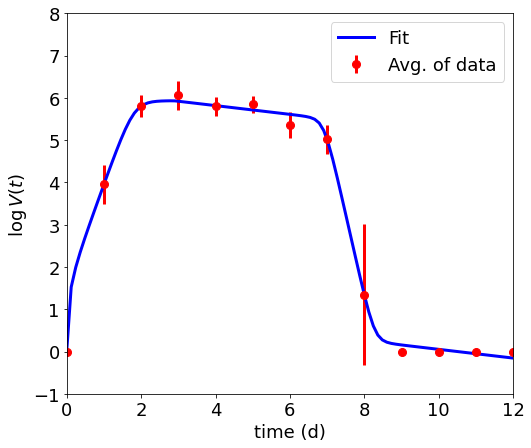

In [11]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_avg.Predict(ttdata)
# plotting
plt.errorbar(tdata_avg, vdata_avg, yerr=vdata_std, fmt='ro', color='red', label='Avg. of data')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018FitAvgData')
plt.show()

The best fit is given by the follwing estimated values (with standard error) and corresponding RSS.

In [12]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.0e} \t{:1.0e} '.format(
    sum(np.power(vl.Eval(tdata_avg, par0) - vdata_avg, 2)), *vl_avg.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.0e} \t{:1.0e} '.format(
    vl_avg.RSS, *vl_avg.par))
print(' SE     \t     \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e' % tuple(vl_avg.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	max
 Init.	1.33e+01	1.000 	2.300 	6.000 	8.500 	0.500 	1e-06 	2e+06 
 Est. 	1.56e-01	0.741 	2.882 	6.226 	7.606 	0.238 	7e-06 	9e+05 
 SE     	     	1e-01 	5e-01 	1e-01 	6e-02 	1e-01 	5e-06 	2e+05


### b) Whole data set

Using the whole data set to fit the model.

In [13]:
tdata_all = np.reshape(np.repeat(tdata, len(data)), (1, -1), order='F')[0]
vdata_all = np.reshape(data, (1, -1), order='F')[0]
vl_all = VirusLoadFunction(tdata_all, vdata_all)

In [14]:
vl_all.InitialGuess(*par0)
vl_all.Fit()

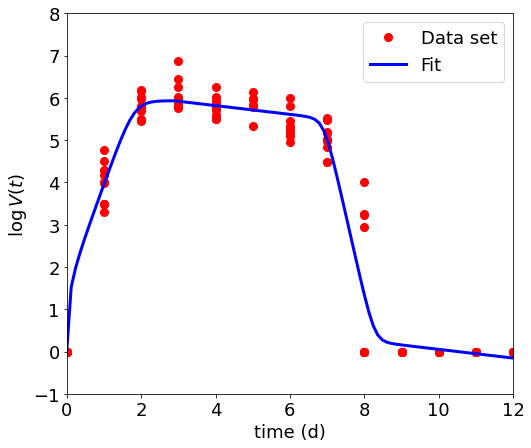

In [15]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_all.Predict(ttdata)
# plotting
plt.plot(tdata_all, vdata_all, 'ro', color='red', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylim((-1., 8.))
plt.ylabel('$\log\, V(t)$')
plt.legend()
savefigs('Smith2018FitAllData')
plt.show()

In [16]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.0e} \t{:1.0e} '.format(
    sum(np.power(vl.Eval(tdata_all, par0) - vdata_all, 2)), *vl_all.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.0e} \t{:1.0e} '.format(
    vl_all.RSS, *vl_all.par))
print(' SE      \t      \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e' % tuple(vl_all.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	max
 Init.	1.68e+02	1.000 	2.300 	6.000 	8.500 	0.500 	1e-06 	2e+06 
 Est. 	3.63e+01	0.741 	2.882 	6.226 	7.606 	0.238 	7e-06 	9e+05 
 SE      	      	1e-01 	5e-01 	1e-01 	7e-02 	1e-01 	6e-06 	2e+05


## 3. %95 percent confidence interval for $a_1$, $a_2$, $b_1$, and $a_2$

Based on part 2 the the best estimation with 95% confidence interval for $a_1$, $a_2$, $b_1$, and $a_2$ can be seen in the following plot.

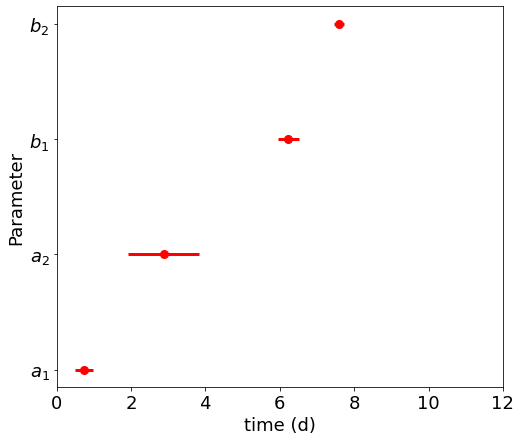

In [17]:
plt.errorbar(vl_all.par[:4], range(4), xerr=1.96*vl_all.par_se[:4], fmt='ro')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.yticks(range(4), ['$a_1$', '$a_2$', '$b_1$', '$b_2$'])
plt.ylabel('Parameter')
plt.show()

**NOTE: We could plot this on top of the data and fitting curve to see the confidence interval regions.**

## 4. Fitting using normal scale

### a) Normal scale and the whole data set

Using the whole data set in normal scale ($10^x$) to fit the model.

In [18]:
tdata_normal = np.reshape(np.repeat(tdata, len(data)), (1, -1), order='F')[0]
vdata_normal = np.power(10, np.reshape(data, (1, -1), order='F')[0])
vl_normal = VirusLoadFunction(tdata_normal, vdata_normal, scale='power')

In [19]:
vl_normal.InitialGuess(1.0, 2.3, 7.0, 9.5, 0.5, 1e-6, 1e6)
vl_normal.Fit(verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.9553e+13                                    3.54e+76    
       1              2         2.7673e+13      1.88e+12       4.69e+05       8.05e+67    
       2              3         2.7673e+13      0.00e+00       0.00e+00       8.05e+67    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 2.9553e+13, final cost 2.7673e+13, first-order optimality 8.05e+67.


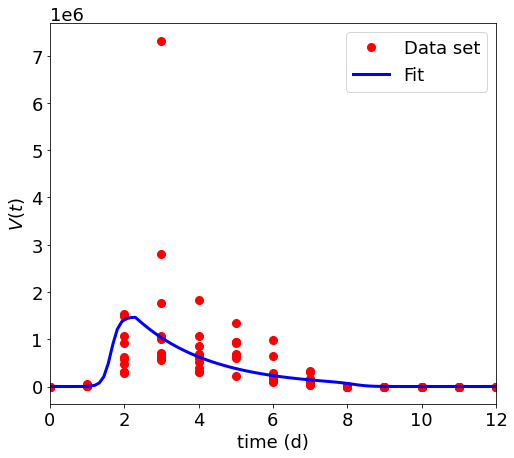

In [20]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_normal.Predict(ttdata)
# plotting
plt.plot(tdata_normal, vdata_normal, 'ro', color='red', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylabel('$V(t)$')
plt.legend()
plt.show()

In [21]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \t \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    sum(np.power(vl.Eval(tdata_normal, par0) - vdata_normal, 2)), *vl_normal.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    vl_normal.RSS, *vl_normal.par))
print(' SE     \t     \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t \t%1.0e' % tuple(vl_normal.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	 	max
 Init.	9.22e+13	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.00e+06 
 Est. 	5.53e+13	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.47e+06 
 SE     	     	6e+00 	8e-01 	5e+01 	8e+01 	2e-01 	5e+00 	 	5e+05


It looks like the values did not change very much and that standard errors are very high, specially $a_1$, $b_1$, $b_2$, and $\min$.

Try starting from the initial parameters values obtained when fitting to data in logarithmic scale.

In [22]:
vl_normal.InitialGuess(0.741, 2.882, 6.226, 7.606, 0.238, 1e-6, 1e6)
vl_normal.Fit(verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.5462e+13                                    1.82e+80    
       1              2         2.5461e+13      3.09e+08       1.50e-02       3.18e+76    
       2              5         2.3660e+13      1.80e+12       7.65e+05       8.90e+79    
       3             39         2.3659e+13      1.09e+09       1.08e-01       4.99e+13    
       4             40         2.3659e+13      0.00e+00       0.00e+00       4.99e+13    
`xtol` termination condition is satisfied.
Function evaluations 40, initial cost 2.5462e+13, final cost 2.3659e+13, first-order optimality 4.99e+13.


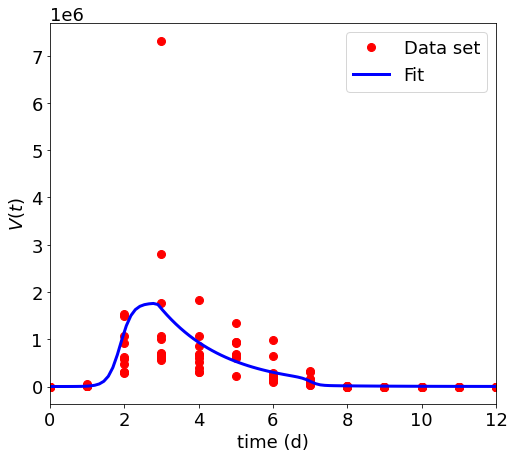

In [23]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_normal.Predict(ttdata)
# plotting
plt.plot(tdata_normal, vdata_normal, 'ro', color='red', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylabel('$V(t)$')
plt.legend()
plt.show()

In [24]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \t \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    sum(np.power(vl.Eval(tdata_normal, par0) - vdata_normal, 2)), *vl_normal.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    vl_normal.RSS, *vl_normal.par))
print(' SE     \t     \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t \t%1.0e' % tuple(vl_normal.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	 	max
 Init.	9.22e+13	0.741 	2.882 	6.226 	7.606 	0.238 	1.00e-06 	1.00e+06 
 Est. 	4.73e+13	0.915 	2.882 	6.367 	7.714 	0.567 	1.43e-01 	1.77e+06 
 SE     	     	5e+00 	3e+00 	6e+02 	7e+02 	2e-01 	2e+00 	 	3e+06


The minimum is now different and the standard errors are actually too high.

In logarithmic scale the fitting does not look very accurate.

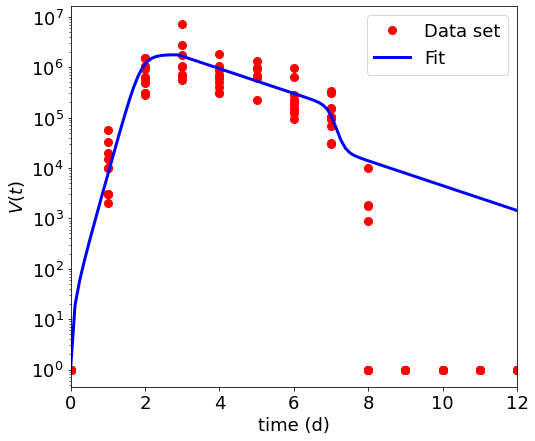

In [25]:
plt.plot(tdata_normal, vdata_normal, 'ro', color='red', label='Data set')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.yscale('log')
plt.ylabel('$V(t)$')
plt.legend()
plt.show()

### b) Normal scale and average of data set

Using the average on normal scale ($10^x$) to fit the model.

We have two options to take the average

1) average then rescale

In [26]:
tdata_normal = tdata
vdata_normal = np.power(10, np.average(data, axis=0))
vdata_normal_std = np.std(data, axis=0)
vl_normal = VirusLoadFunction(tdata_normal, vdata_normal, scale='power')

Using Thomas' best initial guess
$$
a_1=1.0,\quad a_2=2.2,\quad b_1=7.0,\quad b_2=9.5,\quad \alpha=0.5,\quad \min=10^{-6},\quad \max=10^{6}.
$$

In [27]:
vl_normal.InitialGuess(1.0, 2.3, 7.0, 9.5, 0.5, 1e-6, 1e6)
vl_normal.Fit(verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7476e+11                                    8.80e+66    
       1              2         2.6200e+11      1.28e+10       1.22e+05       7.02e+58    
       2              3         2.6200e+11      0.00e+00       0.00e+00       7.02e+58    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 2.7476e+11, final cost 2.6200e+11, first-order optimality 7.02e+58.


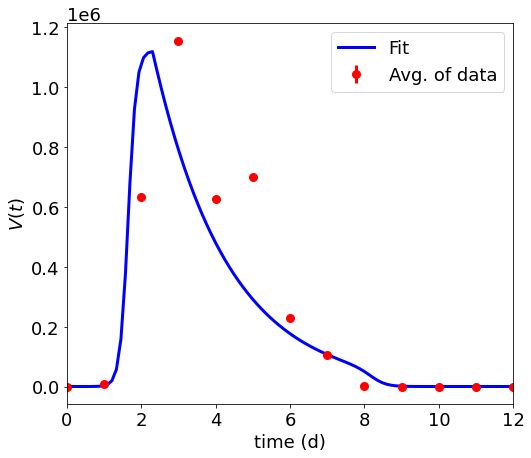

In [28]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_normal.Predict(ttdata)
# plotting
plt.errorbar(tdata_normal, vdata_normal, yerr=vdata_normal_std, fmt='ro', color='red', label='Avg. of data')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylabel('$V(t)$')
plt.legend()
plt.show()

In [29]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \t \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    sum(np.power(vl.Eval(tdata_normal, par0) - vdata_normal, 2)), *vl_normal.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    vl_normal.RSS, *vl_normal.par))
print(' SE     \t     \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t \t%1.0e' % tuple(vl_normal.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	 	max
 Init.	2.67e+12	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.00e+06 
 Est. 	5.24e+11	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.12e+06 
 SE     	     	1e+01 	1e+00 	9e+01 	1e+02 	4e-01 	1e+01 	 	7e+05


2) rescale then average

In [30]:
tdata_normal = tdata
vdata_normal = np.average(np.power(10, data), axis=0)
vdata_normal_std = np.std(data, axis=0)
vl_normal = VirusLoadFunction(tdata_normal, vdata_normal, scale='power')

In [31]:
vl_normal.InitialGuess(1.0, 2.3, 7.0, 9.5, 0.5, 1e-6, 1e6)
vl_normal.Fit(verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.1646e+11                                    1.79e+69    
       1              2         5.2844e+11      1.88e+11       4.69e+05       1.06e+60    
       2              3         5.2844e+11      0.00e+00       0.00e+00       1.06e+60    
`xtol` termination condition is satisfied.
Function evaluations 3, initial cost 7.1646e+11, final cost 5.2844e+11, first-order optimality 1.06e+60.


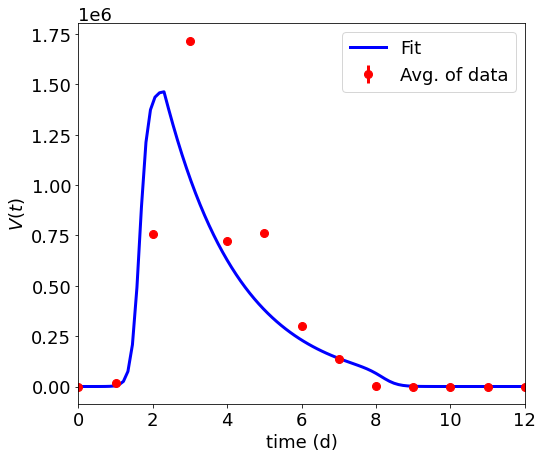

In [32]:
# discretation and evaluation
ttdata = np.linspace(np.min(tdata), np.max(tdata), num=100)
vvdata = vl_normal.Predict(ttdata)
# plotting
plt.errorbar(tdata_normal, vdata_normal, yerr=vdata_normal_std, fmt='ro', color='red', label='Avg. of data')
plt.plot(ttdata, vvdata, 'b-', label='Fit')
plt.xlim((0., 12.))
plt.xlabel('time (d)')
plt.ylabel('$V(t)$')
plt.legend()
plt.show()

In [33]:
print('\nEstimated parameter values:')
print('   \tRSS       \ta_1 \ta_2 \tb_1 \tb_2 \talpha \tmin \t \tmax')
print(' Init.\t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    sum(np.power(vl.Eval(tdata_normal, par0) - vdata_normal, 2)), *vl_normal.par0))
print(' Est. \t{:4.2e}\t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:2.3f} \t{:1.2e} \t{:1.2e} '.format(
    vl_normal.RSS, *vl_normal.par))
print(' SE     \t     \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t%1.0e \t \t%1.0e' % tuple(vl_normal.par_se))


Estimated parameter values:
   	RSS       	a_1 	a_2 	b_1 	b_2 	alpha 	min 	 	max
 Init.	4.74e+12	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.00e+06 
 Est. 	1.06e+12	1.000 	2.300 	7.000 	9.500 	0.500 	1.00e-06 	1.47e+06 
 SE     	     	1e+01 	2e+00 	1e+02 	2e+02 	4e-01 	1e+01 	 	1e+06


It looks like either case we get the same result as in using the whole data set.

## 5. Conclusion

- Ftting to normal scale leads to uncertatinty and issues. It is better to fit in logarithmic.
- The best estimate was obtained for either averaged data or full date set (logarithmic scale).
|            | $a_1$ | $a_2$ | $b_1$ | $b_2$ | $\alpha$ | $\min$ | $\max$ |
|------------|-------|-------|-------|-------|----------|--------|--------|
| Estimate   | 0.741 | 2.882 | 6.226 | 7.606 | 0.238    | 7e-06  | 9e+05  |
| Std. error | 1e-01 | 5e-01 | 1e-01 | 6e-02 | 1e-01    | 5e-06  | 2e+05  |